# Covid-19 Micro Analysis 🎯


#### ✅ Introduction

The "Covid-19 Micro Analysis" project provides an in-depth examination of a focused dataset related to the Covid-19 pandemic. The original dataset contains approximately 19,000 rows, offering a detailed view of the pandemic's progression.

This analysis focuses on data up to April 29, 2020, sourced from Kaggle in CSV format. The primary tool for this analysis is Pandas, a versatile Python library for data manipulation and analysis.

### ✅ Data Loading and Overview

The project begins by:

- Loading the dataset using Pandas.
- Examining the structure and initial records.
- Key columns: Date, State, Region, Confirmed cases, Deaths, and Recovered cases.

**Exploratory Data Analysis (EDA)** is used to assess the data, including:

- Count of non-null values.
- Identification of missing data in each column.

### ✅ Data Loading and Overview



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'covid_19_data.csv'
data = pd.read_csv(file_path)


In [5]:
# Display the first few rows
print("Dataset Preview:")
print(data.head())


Dataset Preview:
        Date State       Region  Confirmed  Deaths  Recovered
0  4/29/2020   NaN  Afghanistan       1939      60        252
1  4/29/2020   NaN      Albania        766      30        455
2  4/29/2020   NaN      Algeria       3848     444       1702
3  4/29/2020   NaN      Andorra        743      42        423
4  4/29/2020   NaN       Angola         27       2          7


In [6]:
# Display dataset info
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [7]:
# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
           Confirmed        Deaths      Recovered
count     321.000000    321.000000     321.000000
mean     9949.800623    709.152648    3030.277259
std     31923.853086   3236.162817   14364.870365
min         0.000000      0.000000       0.000000
25%       104.000000      2.000000       2.000000
50%       653.000000     12.000000      73.000000
75%      4655.000000    144.000000     587.000000
max    299691.000000  27682.000000  132929.000000


### ✅ Null Values and Heatmap
An investigation into null values highlights:

- The State column has 181 missing values. 
- A heatmap is employed to visualize the distribution of missing data, enhancing clarity.



Null Values in Dataset:
Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64


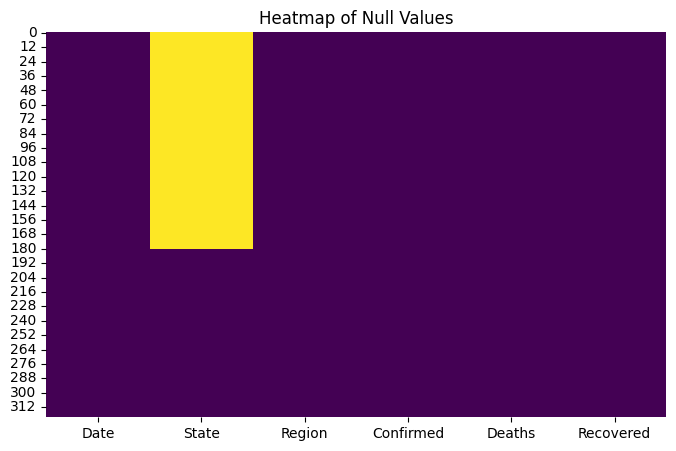

In [9]:
# Check for null values
print("\nNull Values in Dataset:")
print(data.isnull().sum())

# Visualize null values using a heatmap
plt.figure(figsize=(8,5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Null Values")
plt.show()


### ✅ Analysis of Cases by Region
- The number of Confirmed, Deaths, and Recovered cases is analyzed for each region.
- Using the groupby function, the sum of Confirmed and Recovered cases is calculated for every region.
- The results highlight regions with the highest case counts


In [111]:
# Group data by region and calculate sums
region_wise = data.groupby('Region').sum(numeric_only=True)[['Confirmed', 'Recovered', 'Deaths']]

print("\nRegion-wise Case Summary:")
print(region_wise.sort_values(by='Confirmed', ascending=False))




Region-wise Case Summary:
                       Confirmed  Recovered  Deaths
Region                                             
US                       1039909     120720   60967
Spain                     236899     132929   24275
Italy                     203591      71252   27682
France                    166543      49118   24121
UK                        166441        857   26166
...                          ...        ...     ...
Sao Tome and Principe          8          4       0
Papua New Guinea               8          0       0
Bhutan                         7          5       0
Western Sahara                 6          5       0
Yemen                          6          1       0

[187 rows x 3 columns]


### ✅Data Filtering
To focus the analysis:

- Records with Confirmed cases < 10 are filtered out.
- This refines the dataset to emphasize regions with a greater impact.




In [41]:
# Filter out rows where Confirmed cases are less than 10
filtered_data = data[data['Confirmed'] >= 10]

print("\nFiltered Data (Confirmed Cases >= 10):")
print(filtered_data.head())



Filtered Data (Confirmed Cases >= 10):
        Date State       Region  Confirmed  Deaths  Recovered
0  4/29/2020   NaN  Afghanistan       1939      60        252
1  4/29/2020   NaN      Albania        766      30        455
2  4/29/2020   NaN      Algeria       3848     444       1702
3  4/29/2020   NaN      Andorra        743      42        423
4  4/29/2020   NaN       Angola         27       2          7


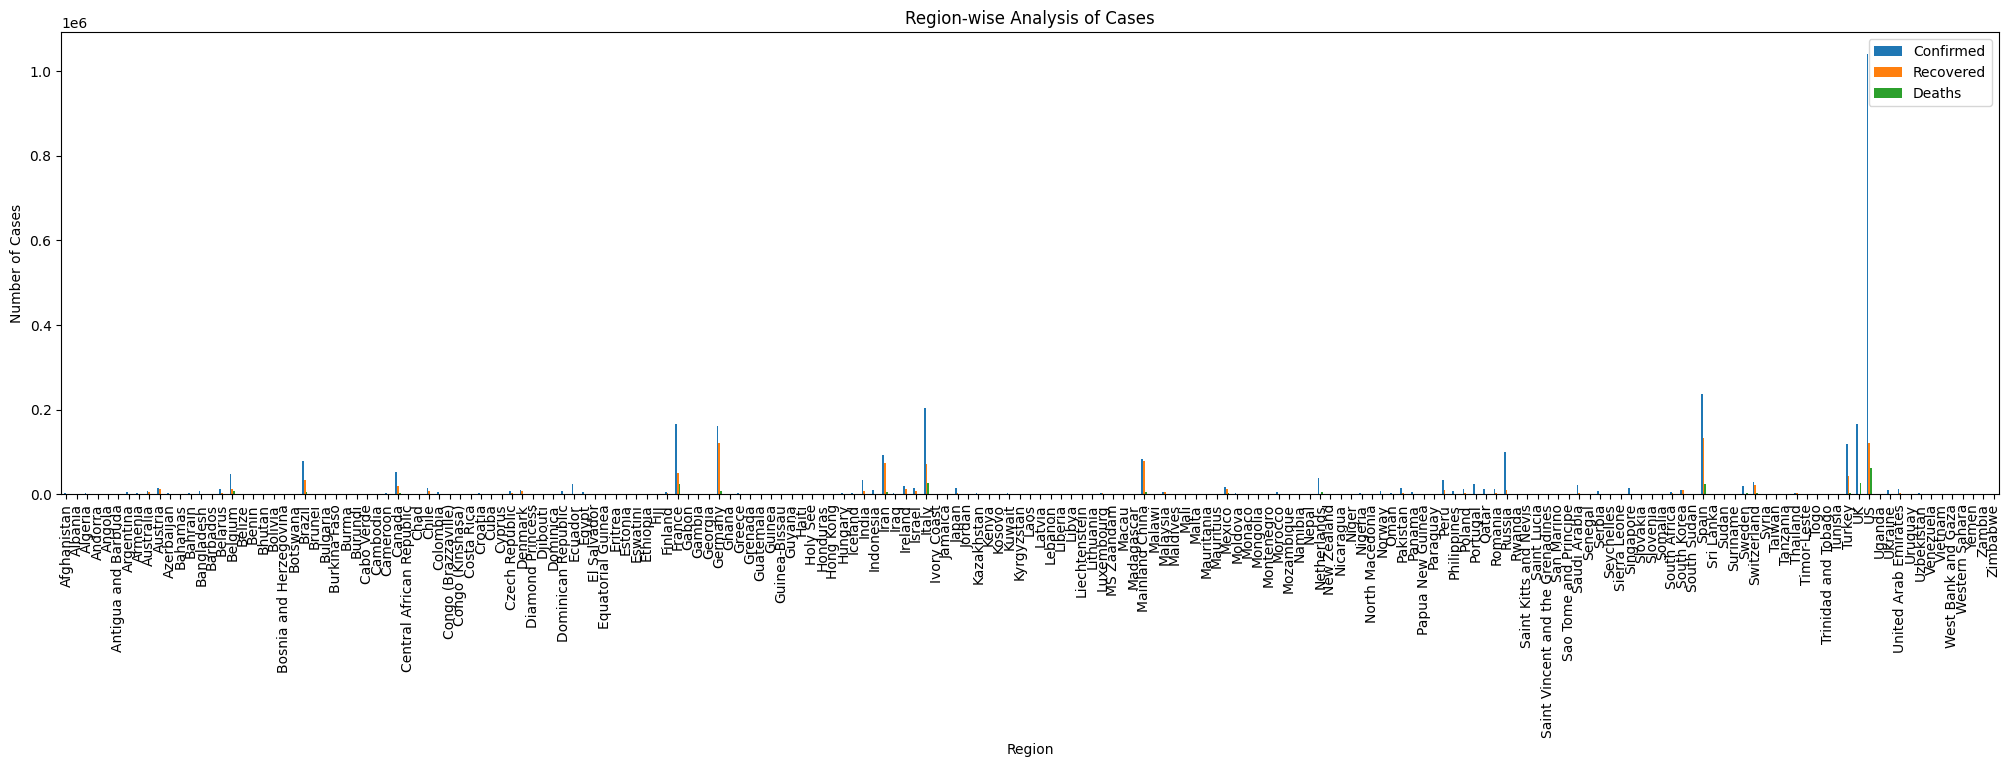

In [ ]:
# Plot a bar chart for visualization
region_wise[['Confirmed', 'Recovered', 'Deaths']].plot(kind='bar', figsize=(25, 6))
plt.title("Region-wise Analysis of Cases")
plt.xlabel("Region")
plt.ylabel("Number of Cases")
plt.xticks(rotation=90) 
plt.show()


### ✅ Region-wise Analysis
Insights are drawn to identify:

- Regions with the maximum and minimum numbers of Confirmed and Deaths cases.
- Aggregation and summarization are performed using the groupby function.

In [43]:
# Region with maximum and minimum Confirmed cases
max_confirmed = region_wise['Confirmed'].idxmax()
min_confirmed = region_wise['Confirmed'].idxmin()

print(f"\nRegion with Maximum Confirmed Cases: {max_confirmed}")
print(f"Region with Minimum Confirmed Cases: {min_confirmed}")

# Region with maximum and minimum Deaths
max_deaths = region_wise['Deaths'].idxmax()
min_deaths = region_wise['Deaths'].idxmin()

print(f"\nRegion with Maximum Deaths: {max_deaths}")
print(f"Region with Minimum Deaths: {min_deaths}")



Region with Maximum Confirmed Cases: US
Region with Minimum Confirmed Cases: Western Sahara

Region with Maximum Deaths: US
Region with Minimum Deaths: Bhutan


### ✅ Country-specific Insights
- Country-specific trends are explored, with a focus on India, showcasing:

- The number of Confirmed, Deaths, and Recovered cases as of April 29, 2020.


In [56]:
# Filter data for India
india_data = data[data['Region'] == 'India'].sum(numeric_only=True)

print("\nCovid-19 Data for India:")
print(india_data[['Confirmed', 'Recovered', 'Deaths']])



Covid-19 Data for India:
Confirmed    33062
Recovered     8437
Deaths        1079
dtype: int64


### ✅ Data Sorting
The dataset is organized to gain insights:

- Sorted in ascending order by the number of Confirmed cases.
- Sorted in descending order by the number of Recovered cases. These steps highlight regions with the least and most significant impacts.

In [57]:
# Sort data by Confirmed cases in ascending order
sorted_confirmed = data.sort_values(by='Confirmed', ascending=True)
print("\nData Sorted by Confirmed Cases (Ascending):")
print(sorted_confirmed[['Region', 'Confirmed']].head())

# Sort data by Recovered cases in descending order
sorted_recovered = data.sort_values(by='Recovered', ascending=False)
print("\nData Sorted by Recovered Cases (Descending):")
print(sorted_recovered[['Region', 'Recovered']].head())



Data Sorted by Confirmed Cases (Ascending):
             Region  Confirmed
285              US          0
284          Canada          0
203          Canada          0
305  Mainland China          1
289          France          1

Data Sorted by Recovered Cases (Descending):
      Region  Recovered
153    Spain     132929
285       US     120720
61   Germany     120400
76      Iran      73791
80     Italy      71252


In [ ]:
# Top 10 Regions by confirmed cases:
top_10_regions = region_summary.sort_values(by='Confirmed', ascending=False).head(10)

top_10_regions

,Confirmed,Deaths,Recovered
Region,,,
US,1039909,60967,120720
Spain,236899,24275,132929
Italy,203591,27682,71252
France,166543,24121,49118
UK,166441,26166,857
Germany,161539,6467,120400
Turkey,117589,3081,44040
Russia,99399,972,10286
Iran,93657,5957,73791


In [128]:
# Total cases summary
Cases_summary = data[['Confirmed', 'Deaths', 'Recovered']].sum()
print(Cases_summary)

Confirmed    3193886
Deaths        227638
Recovered     972719
dtype: int64


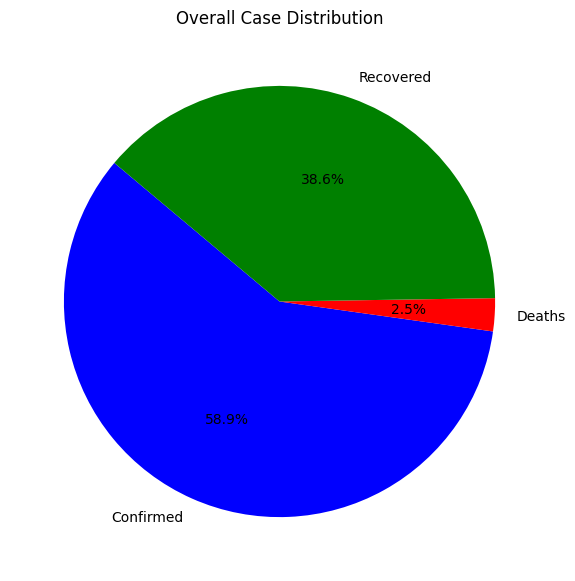

In [123]:
# Total cases
total_cases = region_data[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plotting pie chart
plt.figure(figsize=(7, 7))
plt.pie(total_cases, labels=total_cases.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'green'])
plt.title("Overall Case Distribution")
plt.show()


In [ ]:
region_summary = data.groupby('Region').sum(numeric_only=True)

print(region_summary)


                    Confirmed  Deaths  Recovered
Region                                          
Afghanistan              1939      60        252
Albania                   766      30        455
Algeria                  3848     444       1702
Andorra                   743      42        423
Angola                     27       2          7
...                       ...     ...        ...
West Bank and Gaza        344       2         71
Western Sahara              6       0          5
Yemen                       6       0          1
Zambia                     97       3         54
Zimbabwe                   32       4          5

[187 rows x 3 columns]


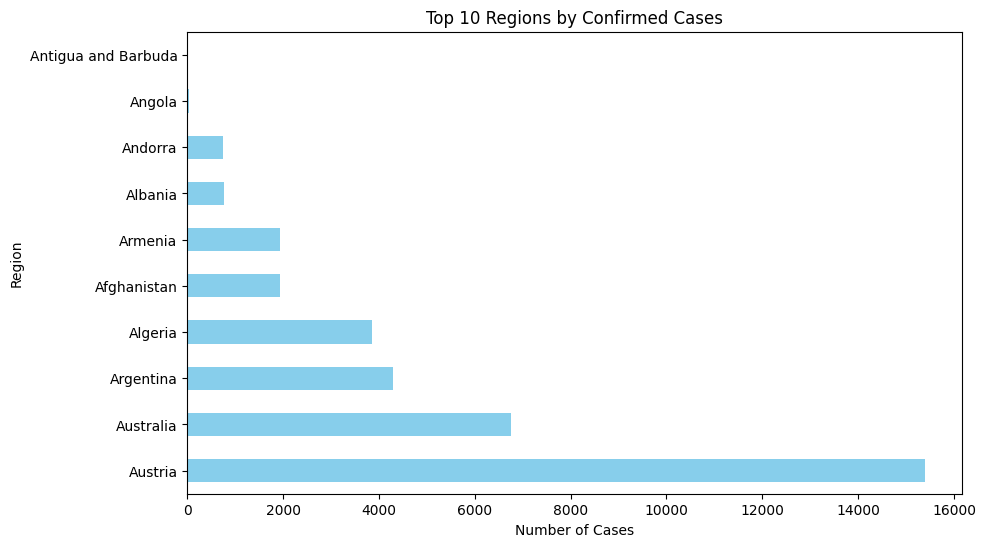

In [122]:
# Top 10 regions by Confirmed cases
top_regions = region_data.sort_values(by='Confirmed', ascending=False).head(10)

# Plotting horizontal bar chart
top_regions['Confirmed'].plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title("Top 10 Regions by Confirmed Cases")
plt.xlabel("Number of Cases")
plt.ylabel("Region")
plt.show()


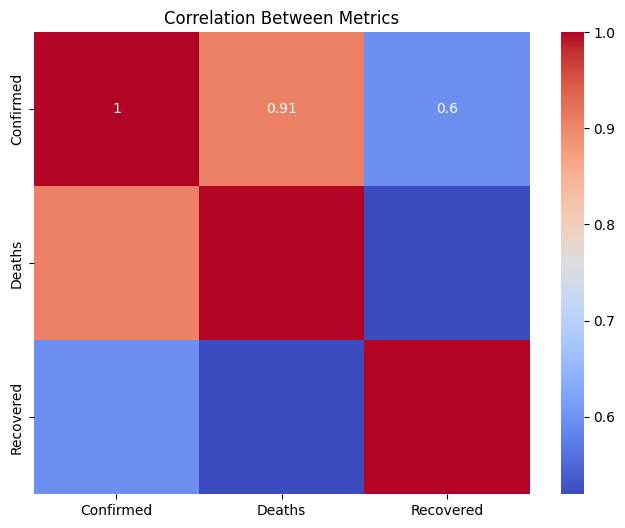

In [108]:
# Heatmap for correlation between numeric columns
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Confirmed', 'Deaths', 'Recovered']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Metrics")
plt.show()
